In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
 
from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
 
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import  RMSprop
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.4,
                                   zoom_range=0.1,
                                   validation_split=0.4,
                                   horizontal_flip=True,)

In [ ]:
train_gernator = train_datagen.flow_from_directory("/content/drive/MyDrive/flowers",
                                                   target_size=(64,64),
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   subset='training',
                                                   shuffle=True)

Found 2599 images belonging to 5 classes.


In [ ]:
validation_gernator = train_datagen.flow_from_directory("/content/drive/MyDrive/flowers",
                                                   target_size=(64,64),
                                                   batch_size=20,
                                                   class_mode='categorical',
                                                   subset='validation',
                                                   shuffle=True)

Found 1728 images belonging to 5 classes.


In [ ]:
validation_gernator[2][1]

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
validation_gernator.labels

array([0, 0, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
train_gernator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=(64,64,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(32,activation='relu'),
                                    tf.keras.layers.Dense(5,activation='softmax')])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 62, 62, 512)       14336     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 512)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 29, 29, 256)       1179904   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)       295040    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)         

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
result = model.fit(train_gernator,steps_per_epoch=30,epochs=20,
                   validation_data=validation_gernator,
                   validation_steps=30)

Epoch 1/20
30/30 [==============================] - 71s 2s/step - loss: 1.0890 - accuracy: 0.5917 - val_loss: 1.6326 - val_accuracy: 0.2967
Epoch 2/20
30/30 [==============================] - 71s 2s/step - loss: 1.0825 - accuracy: 0.5700 - val_loss: 1.0748 - val_accuracy: 0.5833
Epoch 3/20
30/30 [==============================] - 71s 2s/step - loss: 1.0623 - accuracy: 0.6077 - val_loss: 1.0206 - val_accuracy: 0.6133
Epoch 4/20
30/30 [==============================] - 71s 2s/step - loss: 1.0337 - accuracy: 0.5843 - val_loss: 1.0699 - val_accuracy: 0.5650
Epoch 5/20
30/30 [==============================] - 71s 2s/step - loss: 1.0346 - accuracy: 0.6117 - val_loss: 1.0793 - val_accuracy: 0.5933
Epoch 6/20
30/30 [==============================] - 71s 2s/step - loss: 1.0434 - accuracy: 0.6383 - val_loss: 1.1042 - val_accuracy: 0.5467
Epoch 7/20
30/30 [==============================] - 71s 2s/step - loss: 1.0386 - accuracy: 0.5933 - val_loss: 1.3009 - val_accuracy: 0.5333
Epoch 8/20
30/30 [==

In [32]:
model.evaluate(validation_gernator)

87/87 [==============================] - 46s 526ms/step - loss: 0.9344 - accuracy: 0.6279


[0.9343909025192261, 0.6278935074806213]

In [33]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

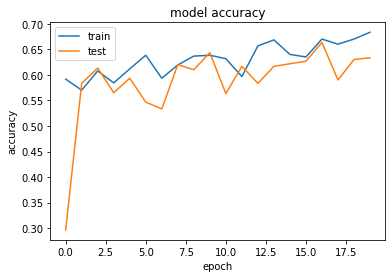

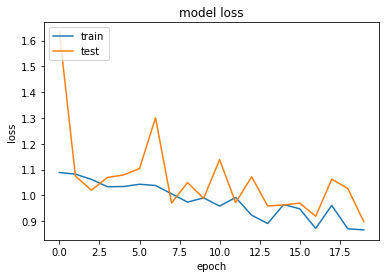

In [34]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy 
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()



In [35]:
import numpy as np
y_pred = np.argmax(model.predict(validation_gernator),axis=1)

In [36]:
y_pred.shape

(1728,)

In [37]:
validation_gernator[0]

(array([[[[4.70945060e-01, 5.02317607e-01, 3.07166189e-01],
          [4.55927193e-01, 5.06126046e-01, 2.97436982e-01],
          [4.59374934e-01, 5.51521480e-01, 3.25193882e-01],
          ...,
          [2.93190658e-01, 3.20641637e-01, 3.52014184e-01],
          [2.85445660e-01, 3.12896669e-01, 3.49019617e-01],
          [2.68396258e-01, 3.00499469e-01, 3.37389052e-01]],
 
         [[4.70945060e-01, 5.02317607e-01, 3.07166189e-01],
          [4.55927193e-01, 5.06126046e-01, 2.97436982e-01],
          [4.59374934e-01, 5.51521480e-01, 3.25193882e-01],
          ...,
          [2.93190658e-01, 3.20641637e-01, 3.52014184e-01],
          [2.85445660e-01, 3.12896669e-01, 3.49019617e-01],
          [2.68396258e-01, 3.00499469e-01, 3.37389052e-01]],
 
         [[4.70945060e-01, 5.02317607e-01, 3.07166189e-01],
          [4.55927193e-01, 5.06126046e-01, 2.97436982e-01],
          [4.59374934e-01, 5.51521480e-01, 3.25193882e-01],
          ...,
          [2.93190658e-01, 3.20641637e-01, 3.5201